<a href="https://colab.research.google.com/github/ricardoadley/dados-pesquisa-metodologia/blob/main/colab_analisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('https://docs.google.com/uc?export=download&id=1gRbTXbzXrdW0sv8wBadl9vjEHauezdFj')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


hora_jogo = {"Entre 0 e 4 horas semanais": 4, 'Entre 5 e 10 horas semanais': 10, 'Entre 11 e 20 horas semanais': 20, 'Entre 21 e 30 horas semanais': 30, 'Mais de 30 horas semanais': 40}
jogar_atrap_aca = {"Discordo totalmente": 1, 'Discordo': 2, 'Não concordo nem discordo': 3, 'Concordo': 4, 'Concordo totalmente': 5}
ambiente_nociv = {'Não nocivo': 0, 'Um pouco nocivo': 2, 'Moderadamente nocivo': 3, 'Muito nocivo': 4, 'Neutro': 1}
sobre_cons_jogos = {'Começei a jogar depois que ingressei no curso': -1, 'Jogava com frequência antes de ingressar no curso e continuo jogando após o ingresso': 2, 'Não jogava antes de ingressar no curso e continuo sem jogar': 0, 'Jogava com frequência, mas parei/reduzi a frequência após ingressar no curso': 1}
alvo_nocivo = {'Não': 0, 'Sim': 1}
jogo_afetou_sono = {'Ocasionalmente': 2, 'Frequentemente': 3, 'Muito frequentemente/ sempre': 4, 'Neutro': 1, 'Raramente/Nunca': 0}
hora_grad = {'Entre 21 e 30 horas semanais': 30, 'Entre 11 e 20 horas semanais': 20, 'Entre 0 e 4 horas semanais': 4, 'Mais de 30 horas semanais': 40, 'Entre 5 e 10 horas semanais': 10}

df['horas_jogo'] = df['horas_jogo'].map(hora_jogo)
df['jogar_atrap_acad'] = df['jogar_atrap_acad'].map(jogar_atrap_aca)
df['ambiente_nocivo'] = df['ambiente_nocivo'].map(ambiente_nociv)
df['sobre_cons_jogos'] = df['sobre_cons_jogos'].map(sobre_cons_jogos)
df['alvo_nocivo'] = df['alvo_nocivo'].map(alvo_nocivo)
df['jogo_afetou_sono'] = df['jogo_afetou_sono'].map(jogo_afetou_sono)
df['horas_grad'] = df['horas_grad'].map(hora_grad)


In [ ]:
df.head()

,data,confirmacao,sobre_cons_jogos,jogar_infl,horas_jogo,horas_grad,jogar_atrap_acad,ambiente_nocivo,alvo_nocivo,comp_nocivo_afetou,jogo_afetou_sono
0,22/11/2022 18:44:53,Concordo e desejo continuar,1,Concordo,10.0,20.0,3.0,3.0,1.0,4.0,1.0
1,22/11/2022 18:45:17,Concordo e desejo continuar,2,Concordo,40.0,10.0,3.0,2.0,1.0,2.0,0.0
2,22/11/2022 18:45:25,Concordo e desejo continuar,1,Discordo,4.0,20.0,2.0,2.0,1.0,3.0,1.0
3,22/11/2022 18:45:33,Concordo e desejo continuar,1,Concordo,30.0,10.0,2.0,2.0,1.0,4.0,3.0
4,22/11/2022 18:52:30,Concordo e desejo continuar,1,Concordo,4.0,10.0,1.0,4.0,1.0,1.0,0.0


In [ ]:
print(f'Percebeu Ambiente Nocivo: {df["ambiente_nocivo"].mean()}')
print(f'Alvo de Comportamento Nocivo: {df["alvo_nocivo"].mean()}')
print(f'Comportamento Nocivo Afetou: {df["jogo_afetou_sono"].mean()}')

Percebeu Ambiente Nocivo: 2.2083333333333335
Alvo de Comportamento Nocivo: 0.875
Comportamento Nocivo Afetou: 1.34375


Podemos notar que por mais que o seja perceptível que o ambiente nocivo, a maior partes do jogadores que 
percebeu isso não se sente afetado por esse ambiente e menos ainda foi alvo desse tipo de comportamento.

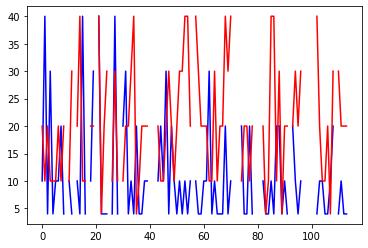

In [ ]:
plt.plot(df['horas_jogo'], color='blue')
plt.plot(df['horas_grad'], color='red')
plt.show()

Jogadores possuem muitas horas de jogo (linhas azuis) possuem poucas horas dedicadas a gradução (linhas vermelhas), o inverso também é observado.

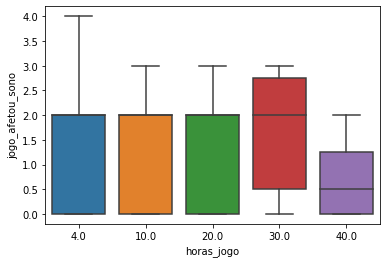

In [ ]:
sns.boxplot(x='horas_jogo', y='jogo_afetou_sono', data=df)
plt.show()

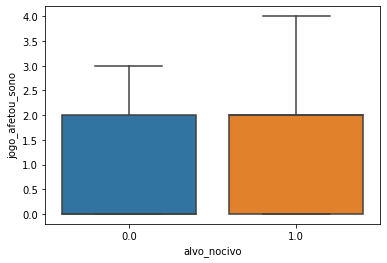

In [ ]:
sns.boxplot(x='alvo_nocivo', y='jogo_afetou_sono', data=df)
plt.show()

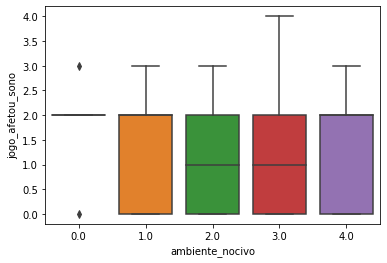

In [ ]:
sns.boxplot(x='ambiente_nocivo', y='jogo_afetou_sono', data=df)

Text(0.5, 1.0, 'Correlation between different fearures')

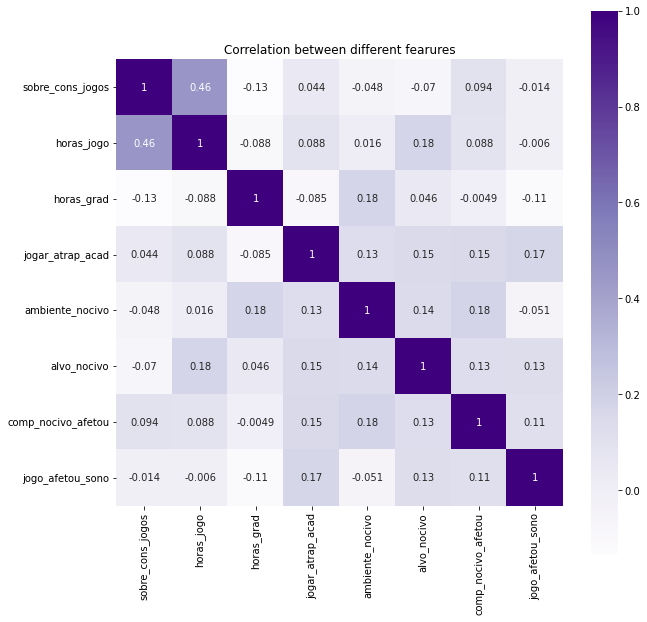

In [ ]:
#plot correlation matrix
corr = df.corr(method='kendall')
plt.figure(figsize=(10,10))
sns.heatmap(corr, vmax=1, square=True,annot=True,cmap='Purples')
plt.title('Correlation between different fearures')

In [ ]:
df['jogar_infl'].value_counts()

Concordo                     30
Não concordo nem discordo    19
Concordo totalmente          18
Discordo totalmente          16
Discordo                     13
Name: jogar_infl, dtype: int64

Correlações interessantes:

Percebesse um correlação negativa entre tempo de jogo e tempo dedicado a graduação, indicando inversa proporcionalidade.

Nota-se também uma correláção enorme entre tempo de jogo e sobre o consumo de jogos no geral, demostrando que os jogadores que jogavam antes da graduação e continuam jogando utilizam mais tempo para jogar.



